# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import statsmodels.api as sm

plt.style.use('seaborn')

# Data

In [2]:
data = pd.read_csv('Data\interview_data.csv')
data['Date']=pd.to_datetime(data['Date'])
data = data.set_index(['Date'])

data.head(3)

,Area
Date,
1999-07-12,B
1999-12-17,E
1999-12-24,D


In [3]:
daily_count=data.groupby('Date').count().reset_index()

Date=daily_count['Date']
Area=daily_count['Area']

daily_count.head(3)

,Date,Area
0,1999-07-12,1
1,1999-12-17,1
2,1999-12-24,1


# Daily

In [4]:
data.reset_index(inplace=True)
print(min(data['Date']), max(data['Date']))
min_date = min(data['Date'])
max_data = max(data['Date'])

data = data.set_index(['Date'])

1999-07-12 00:00:00 2012-12-07 00:00:00


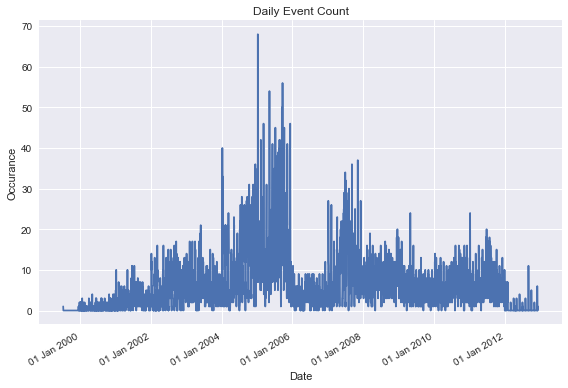

In [5]:
dt = data.groupby(pd.Grouper(freq='D')).size().reset_index().rename({0:'size'},axis=1)

Date = dt['Date']
Area = dt['size']

plt.plot_date(Date,Area,linestyle='solid',marker=None)
plt.gcf().autofmt_xdate()
# get current figure
date_format=mpl_dates.DateFormatter('%d %b %Y')
# set date format

plt.gca().xaxis.set_major_formatter(date_format)

plt.title('Daily Event Count')
plt.xlabel('Date')
plt.ylabel('Occurance')

plt.tight_layout()
plt.show()

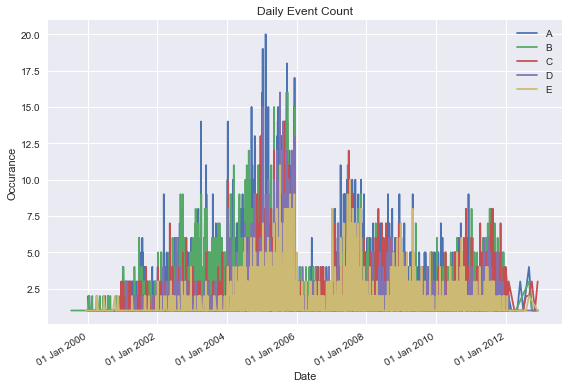

In [6]:
dt = data.groupby([pd.Grouper(freq='D'),'Area']).size().reset_index().rename({0:'size'},axis=1)
dt.head()

dt_dict = {}
for i in ['A','B','C','D','E']:
    dt_dict[i] = dt[dt['Area']==i]

    
for i in ['A','B','C','D','E']:
    Date = dt_dict[i]['Date']
    Area = dt_dict[i]['size']
    plt.plot_date(Date,Area,linestyle='solid',marker=None, label=i)
    
plt.gcf().autofmt_xdate()
# get current figure
date_format=mpl_dates.DateFormatter('%d %b %Y')
# set date format

plt.gca().xaxis.set_major_formatter(date_format)

plt.title('Daily Event Count')
plt.xlabel('Date')
plt.ylabel('Occurance')
plt.legend()

plt.tight_layout()
plt.show()

# Monthly

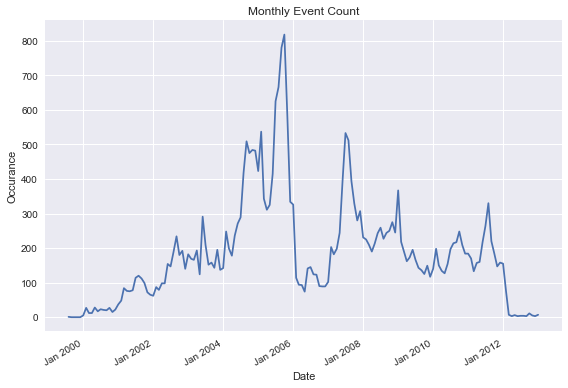

In [7]:
dt = data.groupby(pd.Grouper(freq='M')).size().reset_index().rename({0:'size'},axis=1)

Date = dt['Date']
Area = dt['size']

plt.plot_date(Date,Area,linestyle='solid',marker=None)
plt.gcf().autofmt_xdate()
# get current figure
date_format=mpl_dates.DateFormatter('%b %Y')
# set date format

plt.gca().xaxis.set_major_formatter(date_format)

plt.title('Monthly Event Count')
plt.xlabel('Date')
plt.ylabel('Occurance')

plt.tight_layout()
plt.show()

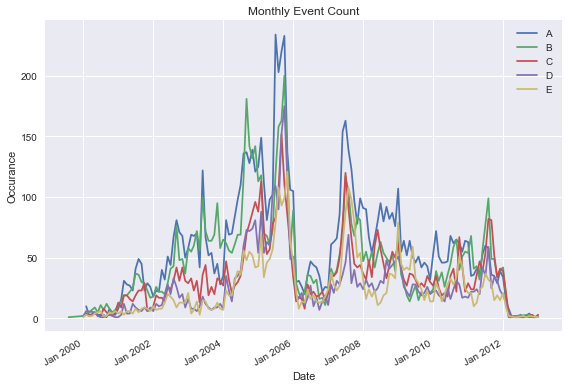

In [8]:
dt = data.groupby([pd.Grouper(freq='M'),'Area']).size().reset_index().rename({0:'size'},axis=1)
dt.head()

dt_dict = {}
for i in ['A','B','C','D','E']:
    dt_dict[i] = dt[dt['Area']==i]

    
for i in ['A','B','C','D','E']:
    Date = dt_dict[i]['Date']
    Area = dt_dict[i]['size']
    plt.plot_date(Date,Area,linestyle='solid',marker=None, label=i)
    
plt.gcf().autofmt_xdate()
# get current figure
date_format=mpl_dates.DateFormatter('%b %Y')
# set date format

plt.gca().xaxis.set_major_formatter(date_format)

plt.title('Monthly Event Count')
plt.xlabel('Date')
plt.ylabel('Occurance')
plt.legend()
    
plt.tight_layout()
plt.show()

In [9]:
print(min(dt['Date']), max(dt['Date']))
min_date = min(dt['Date'])
max_data = max(dt['Date'])

1999-07-31 00:00:00 2012-12-31 00:00:00


## Monthly stacked plot
this would require all the series data points to share a common x date axis, hence I will be creating a series that covers all the date range through rrule, and then joining all the other the area series into it (to ensure they share the axis, and that no months are skipped).

In [10]:
from dateutil.rrule import *
from datetime import date

# months = map(
#     date.isoformat,
#     rrule(MONTHLY, dtstart=date(2010, 8, 1), until=date.today())
# )

months = [dt.date().isoformat() for dt in rrule(MONTHLY, dtstart=date(1999, 7, 1), until=max_data)]
tmp_date = pd.DataFrame(list(months)).rename({0:'Date'},axis=1)
tmp_date['Date'] = pd.to_datetime(tmp_date['Date'])
tmp_date = tmp_date.set_index('Date').groupby([pd.Grouper(freq='M')]).first()
# tmp_date.head()

date_area_dt = (tmp_date
.join(dt_dict['A'][['Date','size']].set_index('Date').rename({'size':'A'}, axis=1))
.join(dt_dict['B'][['Date','size']].set_index('Date').rename({'size':'B'}, axis=1))
.join(dt_dict['C'][['Date','size']].set_index('Date').rename({'size':'C'}, axis=1))
.join(dt_dict['D'][['Date','size']].set_index('Date').rename({'size':'D'}, axis=1))
.join(dt_dict['E'][['Date','size']].set_index('Date').rename({'size':'E'}, axis=1))
).fillna(0).reset_index()

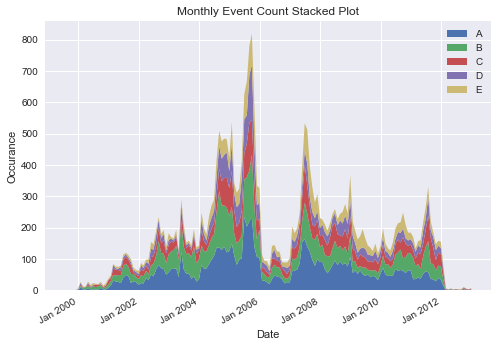

In [11]:
y = [
    date_area_dt['A'].values.tolist(),
    date_area_dt['B'].values.tolist(),
    date_area_dt['C'].values.tolist(),
    date_area_dt['D'].values.tolist(),
    date_area_dt['E'].values.tolist()
]

x = date_area_dt['Date']

# plt.figure(1, figsize=(5,3))

# Plot
plt.stackplot(x,y, labels=['A','B','C','D','E'])
plt.legend(loc='upper left')


plt.gcf().autofmt_xdate()
# get current figure
date_format=mpl_dates.DateFormatter('%b %Y')
# set date format

plt.gca().xaxis.set_major_formatter(date_format)

plt.title('Monthly Event Count Stacked Plot')
plt.xlabel('Date')
plt.ylabel('Occurance')
plt.legend()

plt.show()

# Yearly

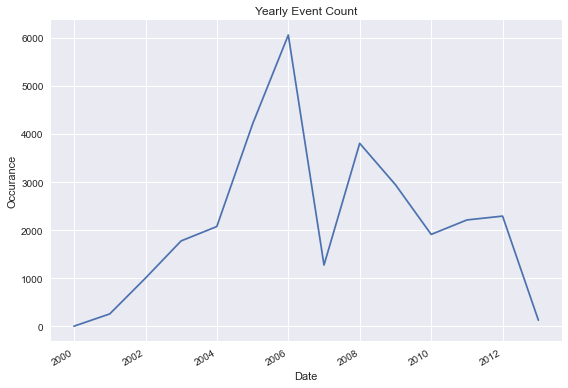

In [12]:
dt = data.groupby(pd.Grouper(freq='Y')).size().reset_index().rename({0:'size'},axis=1)

Date = dt['Date']
Area = dt['size']

plt.plot_date(Date,Area,linestyle='solid',marker=None)
plt.gcf().autofmt_xdate()
# get current figure
date_format=mpl_dates.DateFormatter('%Y')
# set date format

plt.gca().xaxis.set_major_formatter(date_format)

plt.title('Yearly Event Count')
plt.xlabel('Date')
plt.ylabel('Occurance')

plt.tight_layout()
plt.show()

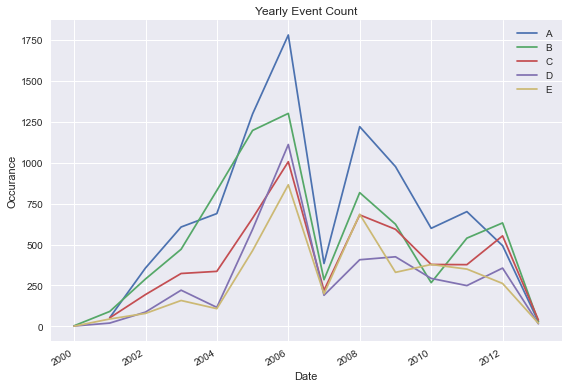

In [13]:
dt = data.groupby([pd.Grouper(freq='Y'),'Area']).size().reset_index().rename({0:'size'},axis=1)
dt.head()

dt_dict = {}
for i in ['A','B','C','D','E']:
    dt_dict[i] = dt[dt['Area']==i]

    
for i in ['A','B','C','D','E']:
    Date = dt_dict[i]['Date']
    Area = dt_dict[i]['size']
    plt.plot_date(Date,Area,linestyle='solid',marker=None, label=i)
    
plt.gcf().autofmt_xdate()
# get current figure
date_format=mpl_dates.DateFormatter('%Y')
# set date format

plt.gca().xaxis.set_major_formatter(date_format)

plt.title('Yearly Event Count')
plt.xlabel('Date')
plt.ylabel('Occurance')
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
year = [dt.date().isoformat() for dt in rrule(YEARLY, dtstart=date(1999, 7, 1), until=max_data)]
tmp_date = pd.DataFrame(list(year)).rename({0:'Date'},axis=1)
tmp_date['Date'] = pd.to_datetime(tmp_date['Date'])
tmp_date = tmp_date.set_index('Date').groupby([pd.Grouper(freq='Y')]).first()
tmp_date

date_area_dt = (tmp_date
.join(dt_dict['A'][['Date','size']].set_index('Date').rename({'size':'A'}, axis=1))
.join(dt_dict['B'][['Date','size']].set_index('Date').rename({'size':'B'}, axis=1))
.join(dt_dict['C'][['Date','size']].set_index('Date').rename({'size':'C'}, axis=1))
.join(dt_dict['D'][['Date','size']].set_index('Date').rename({'size':'D'}, axis=1))
.join(dt_dict['E'][['Date','size']].set_index('Date').rename({'size':'E'}, axis=1))
).fillna(0).reset_index()

In [15]:
date_area_dt.head()

,Date,A,B,C,D,E
0,1999-12-31,0.0,3,0.0,2,1
1,2000-12-31,53.0,91,52.0,20,45
2,2001-12-31,356.0,289,194.0,87,79
3,2002-12-31,607.0,471,323.0,221,158
4,2003-12-31,689.0,830,336.0,116,108


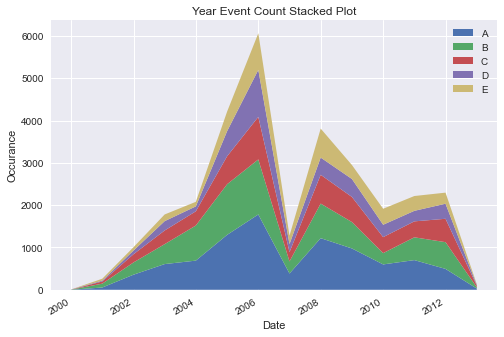

In [16]:
y = [
    date_area_dt['A'].values.tolist(),
    date_area_dt['B'].values.tolist(),
    date_area_dt['C'].values.tolist(),
    date_area_dt['D'].values.tolist(),
    date_area_dt['E'].values.tolist()
]

x = date_area_dt['Date']


# Plot
plt.stackplot(x,y, labels=['A','B','C','D','E'])
plt.legend(loc='upper left')


plt.gcf().autofmt_xdate()
# get current figure
date_format=mpl_dates.DateFormatter('%Y')
# set date format

plt.gca().xaxis.set_major_formatter(date_format)

plt.title('Year Event Count Stacked Plot')
plt.xlabel('Date')
plt.ylabel('Occurance')
plt.legend()

plt.show()

# Tree map
Events occured at respective area throughout the historical data

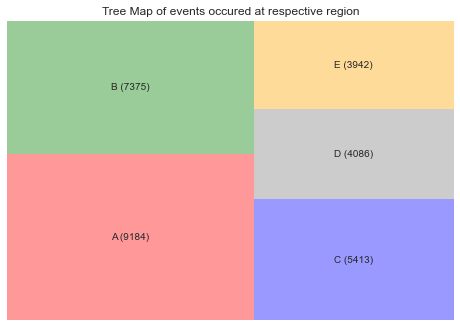

In [17]:
import pandas as pd
import squarify
# !pip install squarify

sq_dt = data.groupby('Area').size().reset_index().rename({0:'Event Count'}, axis=1)
sq_dt['Area'] = [str(x)+" ("+str(y)+")" for x,y in zip(sq_dt['Area'],sq_dt['Event Count'])]
squarify.plot(sizes=sq_dt['Event Count'], label=sq_dt['Area'], alpha=.4, color=["red","green","blue", "grey","orange"])

plt.axis('off')
plt.title('Tree Map of events occured at respective region')
plt.show()


# Daily Occurance of Events for 1 day Forecasting

In [18]:
# creating a daily date range that covers all the data, this would ensure that all the dates are recorded as per the occurance on date.
# ie, we will then be able to just fit a series/forecasting method on it while ignoring the date.

days = [dt.date().isoformat() for dt in rrule(DAILY, dtstart=date(1999, 7, 1), until=max_data)]
tmp_date = pd.DataFrame(list(days)).rename({0:'Date'},axis=1)
tmp_date['Date'] = pd.to_datetime(tmp_date['Date'])

# groupby data
tmp_dt = data.groupby([pd.Grouper(freq='D')]).size().reset_index().rename({0:'Count'},axis=1)
tmp_dt

x_dt = tmp_date.set_index('Date').join(tmp_dt.set_index('Date')).reset_index().fillna(0)
x_dt.to_csv('Data\daily.csv', index=False)

In [19]:
x_dt.head()

,Date,Count
0,1999-07-01,0.0
1,1999-07-02,0.0
2,1999-07-03,0.0
3,1999-07-04,0.0
4,1999-07-05,0.0


# TimeSeriesSplit

Observations: 1634
Training Observations: 818
Testing Observations: 816
Observations: 2450
Training Observations: 1634
Testing Observations: 816
Observations: 3266
Training Observations: 2450
Testing Observations: 816
Observations: 4082
Training Observations: 3266
Testing Observations: 816
Observations: 4898
Training Observations: 4082
Testing Observations: 816


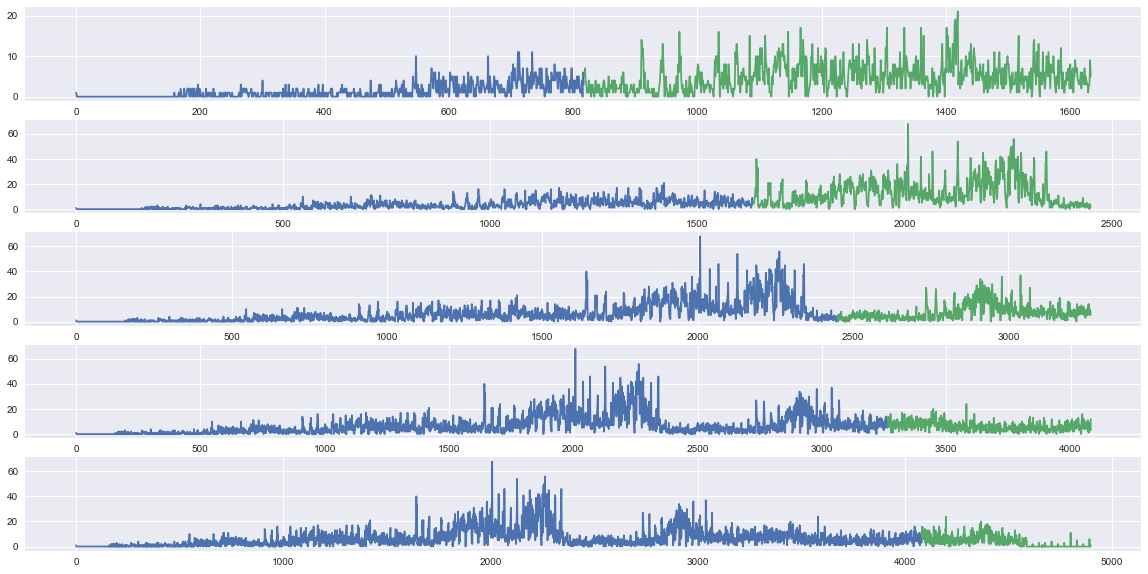

In [20]:
from sklearn.model_selection import TimeSeriesSplit

X = tmp_dt['Count'].values
splits = TimeSeriesSplit(n_splits=5)
plt.figure(1, figsize=(20,10))
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    plt.subplot(510 + index)
    plt.plot(train)
    plt.plot([None for i in train] + [x for x in test])
    index += 1
plt.show()

Not so suitable for this case, as we are seeking
> Build a model to perform a 1-day forecast of the total number of daily occurrences.  

ie, a 1 day look forward forecast

# Walk Forward Method

1. **Minimum Number of Observations**. First, we must select the minimum number of observations required to train the model. This may be thought of as the window width if a sliding window is used (see next point).
2. **Sliding or Expanding Window**. Next, we need to decide whether the model will be trained on all data it has available or only on the most recent observations. This determines whether a sliding or expanding window will be used.


**How To Backtest Machine Learning Models for Time Series Forecasting**

https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/

**11 Classical Time Series Forecasting Methods in Python (Cheat Sheet)**

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [21]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# https://www.statsmodels.org/stable/examples/notebooks/generated/exponential_smoothing.html

def last_know_x(train):
    # return the moving average of the last x days 
    return train[len(train)-1:][0]

def moving_average_last_days(train, days=7):
    # return the moving average of the last x days 
    return np.mean(train[len(train)-days:])

def last_valid_over_x_days(train, days=7):
    # return the last valid values over x days, if none are found, return 0 
    result = [a for a in train[len(train)-days:] if a!=0]
    return result[len(result)-1] if result else 0
    
def simple_exp_smoothing_(train):
    fit1 = SimpleExpSmoothing(train).fit()
    return  fit1.forecast(1)
    
def holt_(train):
    fit2 = Holt(train).fit()
    return  fit2.forecast(1)
    
# def exponential_(train):
#     fit3 = Holt(train,exponential=True).fit()
#     return  fit3.forecast(1)
    
def additive_(train):
    fit4 = Holt(train,damped=True).fit(damping_slope=0.98)
    return  fit4.forecast(1)

# def multiplicative_(train):
#     fit5 = Holt(train,exponential=True,damped=True).fit()
#     return  fit5.forecast(1)
    

In [22]:
X = tmp_dt['count'].values

initial = 1095 #3yrs
n_train = len(X)-initial
n_records = len(X)

target_list = []

last_know = []
moving_average3 = []
moving_average7 = []
moving_average21 = []
last_valid7 = []
last_valid21 = []
# s
simple_exp_smoothing_l = []
holt_l = []
additive_l = []

for i in range(n_train, n_records):
    train, target = X[0:i], X[i:i+1]
    
    # target
    target_list.append(target)
    
    # methods
    last_know.append(last_know_x(train))
    moving_average3.append(moving_average_last_days(train, days=3))
    moving_average7.append(moving_average_last_days(train, days=7))
    moving_average21.append(moving_average_last_days(train, days=21))
    last_valid7.append(last_valid_over_x_days(train, days=7))
    last_valid21.append(last_valid_over_x_days(train, days=21))
    
    simple_exp_smoothing_l.append(simple_exp_smoothing_(train))
    holt_l.append(holt_(train))
    additive_l.append(additive_(train))
    

KeyError: 'count'

In [ ]:
from sklearn.metrics import mean_squared_error

print('last_know        :', mean_squared_error(target_list, last_know))
print('moving_average3  :', mean_squared_error(target_list, moving_average3))
print('moving_average7  :', mean_squared_error(target_list, moving_average7))
print('moving_average21 :', mean_squared_error(target_list, moving_average21))
print('last_valid7      :', mean_squared_error(target_list, last_valid7))
print('last_valid21     :', mean_squared_error(target_list, last_valid21))

print('simple_exp_smooth:', mean_squared_error(target_list, simple_exp_smoothing_l))
print('holt_l           :', mean_squared_error(target_list, holt_l))
print('additive_l       :', mean_squared_error(target_list, additive_l))

